# 605.621 - Foundations of Algorithms

## Assignment 06

Sabbir Ahmed

April 18, 2021

### Question 1

\[20 pts, Huffman coding\]

Solve exercise 16.3-3 (Cormen page 436).

What is an optimal Huffman code for the following set of frequencies, based on the first 8 Fibonacci numbers?

`a:1 b:1 c:2 d:3 e:5 f:8 g:13 h:21`

Can you generalize your answer to find the optimal code when the frequencies are the first $n$ Fibonacci numbers?

### Answer



Building a Huffman tree with the given frequencies:

```
54
|-------|
h:21    33
        |-------|
        g:13    20
                |-------|
                f:8     12
                        |-------|
                        e:5     7
                                |-------|
                                d:3     4
                                        |-------|
                                        c:2     2
                                                |-------|
                                                b:1     a:1
```

Where the left child has a weight of 0 and the right a weight of 1.

The Huffman codes are as follows:
- `h`: `0`
- `g`: `10`
- `f`: `110`
- `e`: `1110`
- `d`: `11110`
- `c`: `111110`
- `b`: `1111110`
- `a`: `1111111`

The frequencies of the first $n$ Fibonacci numbers can be represented as the recurrence relation $F_{n+2}=F_{n+1}+F_n= \sum_{i=0}^{n}F_i+1$

-----------------------------------------

### Question 2

\[20 pts, algorithms\]

Consider evaluating a polynomial, e.g. given $f(x)=x^5 +3x^2 -x+2, f(2) = 44$

Considering the general case, where the degree of the polynomial is $n$, state (i) a naive algorithm, and (ii) a linear algorithm to evaluate polynomials for a given real valued input.

What is the type of this linear algorithm?

### Answer

A naive algorithm would be to replace $x$ in the given polynomial with the inputted real value $2$, and then following traditional arithmetic rules to compute the result:

$f(x) = x^5 + 3x^2 - x + 2$

$f(2) = (2)^5 +3(2)^2 - (2) + 2$, replace the variable with the input real value

$f(2) = 32 + 3(4) - (2) + 2$, compute all exponential expressions

$f(2) = 32 + 12 - 2 + 2$, compute all multiplication expressions

$f(2) = 44 - 2 + 2$, begin adding 2 operands at a time to maintain PEMDAS constraints

$f(2) = 42 + 2$

$f(2) = 44$

This algorithm would be similar to the general case with any polynomial of degree $n$.

The number of steps appear to be $n=5$ suggesting a linear time complexity. However, some operations, such as computing all the exponential expressions, can be significantly more expensive than some of the latter steps, such as adding 2 operands.

A linear algorithm would be gathering the coefficients of the polynomial and iteratively adding the products of terms, as described in Horner's rule (Introduction to Algorithms, Section 30.1)

$\sum_{k=0}^na_{k}x^{k} = a_{0} + x(a_{1} + x(a_{2} + ... + x(a_{n-1} + xa_{n})))$

In [1]:
def horner(coeffs, x):
    """Implementation of Horner's rule described above"""
    # initialize result with the first coefficient
    result = coeffs[0]

    # iteratively compute the result by accumulating the products of terms
    for i in range(1, len(coeffs)):
        result = result * x + coeffs[i]

    return result


# x^5 + 3x^2 - x + 2
coeffs = [1, 0, 0, 3, -1, 2]

print(horner(coeffs, 2))

44


Horner's rule has a much more balanced number of computations per each iterations. The accumulation takes $n + 1$ iterations resulting in a linear time complexity of $O(n)$.

-----------------------------------------

### Question 3

\[40 pts, DFS and BFS\]

Using the DFS and BFS pseudocode/Python scripts in the lecture notes, empirically show that both DFS and BFS can be completed in $O(|V|+|E|)$.

### Answer

Using the scripts provided in lecture notes:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

np.random.seed(123)

In [3]:
# Set a vertex class to store DFS (first timestamp) and parent
class Vertex:
    def __init__(self, label):
        self.label = label
        self.dfs = None
        self.p = None
        self.seen = False


# Root is specially handled
ROOT_PARENT_LABEL = "nul"
ROOT_PARENT = Vertex(ROOT_PARENT_LABEL)


def adj_list(_e: list) -> (dict, dict):  # _e is a list of 2-tuples
    """Generate an adjacency list from the input edges _e"""
    from collections import defaultdict
    assert type(_e) is list
    assert type(_e[0]) is tuple

    edges = defaultdict(list)
    vertices = {}  # convert the labels to vertex objects
    for v1, v2 in _e:
        if v1 not in vertices:
            vertices[v1] = Vertex(v1)
        if v2 not in vertices:
            vertices[v2] = Vertex(v2)
        edges[v1] += [vertices[v2]]
        edges[v2] += [vertices[v1]]
    # Sort adjacency list edges
    for v in edges:
        edges[v] = sorted(edges[v], key=lambda x: x.label)

    return vertices, edges

Constructing a single class to generate a random graph to compute both DFS and BFS and generating summary statistics:

In [4]:
class GraphGenerator():

    def __init__(self, v):
        """Generate a random undirected graph of `v` nodes and `v` * 2 < x < `v` * 5
        edges and provide methods to find all the maximal and maximum cliques.

        Args:
            v <int>: number of vertices for the random graph
        """
        # number of nodes in the graph
        self.v = v

        # number of recursive calls made
        self.dfs_iterations = 1
        self.bfs_iterations = 1

        # generate a random number between n and 5n
        self.e = np.random.randint(self.v * 2, self.v * 5)

        # generate a random graph of n nodes and e edges
        self.G = nx.gnm_random_graph(self.v, self.e)

        self.dfs_vertices, self.dfs_edges = adj_list(list(self.G.edges))
        self.bfs_vertices, self.bfs_edges = adj_list(list(self.G.edges))

        self.dfs_root = self.dfs_vertices[1]
        self.dfs_root.p = ROOT_PARENT

        self.bfs_root = self.bfs_vertices[1]
        self.bfs_root.p = ROOT_PARENT
        
        self.sum_v_e = 0
        self.factor = 0

    def dfs(self):
        """Perform a DFS on the graph"""
        # pre-order traversal to populate dfs values
        stack = [self.dfs_root]  # stack is simply a Python list
        while len(stack) > 0:
            v1 = stack.pop()
            if not v1.seen:  # not visited yet
                v1.seen = True
                v1.dfs = self.dfs_iterations
                # edge dictionary key is vertex label, value is list of nodes
                for v2 in self.dfs_edges[v1.label]:
                    if not v2.seen:  # not visited yet
                        v2.p = v1  # set parent
                        stack += [v2]
                    self.dfs_iterations += 1

    def bfs(self):
        """Perform a BFS on the graph"""
        # in-order traversal to populate dfs values
        queue = [self.bfs_root]  # queue is simply a Python list
        while len(queue) > 0:
            v1 = queue.pop(0)  # Get the first element
            if not v1.seen:  # not visited yet
                v1.seen = True
                v1.dfs = self.bfs_iterations
                # edge dictionary key is vertex label, value is list of nodes
                for v2 in self.bfs_edges[v1.label]:
                    if not v2.seen:  # not visited yet
                        v2.p = v1  # set parent
                        queue += [v2]
                    self.bfs_iterations += 1

    def get_stats(self):
        """Compute simple statistics"""
        # |V| + |E|
        self.sum_v_e = self.v + self.e

        # compute the constant factor c of c(|V| + |E|)
        max_val = max((self.sum_v_e), (self.bfs_iterations + self.dfs_iterations) // 2)
        min_val = min((self.sum_v_e), (self.bfs_iterations + self.dfs_iterations) // 2)
        self.factor = max_val / min_val

    def report(self):
        """Report the statistics"""
        print(f"Total number of DFS iterations: {self.dfs_iterations}")
        print(f"Total number of BFS iterations: {self.bfs_iterations}")
        print(f"Number of vertices (|V|): {self.v}")
        print(f"Number of edges (|E|): {self.e}")
        print(f"|V|+|E|: {self.sum_v_e}")
        print(f"Factor: {self.factor}")

Total number of DFS iterations: 67
Total number of BFS iterations: 67
Number of vertices (|V|): 10
Number of edges (|E|): 33
|V|+|E|: 43
Factor: 1.558139534883721


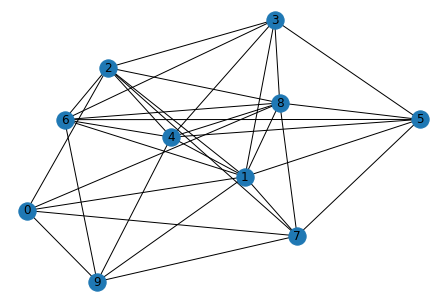

In [5]:
graph = GraphGenerator(10)
nx.draw(graph.G, with_labels=True)
graph.dfs()
graph.bfs()
graph.get_stats()
graph.report()

In [6]:
print(f"{'Vertices':<6} | {'Edges':<6} | {'Sum':<6} | {'BFS':<6} | {'DFS':<6} | {'Factor':<6}")
print("------------------------------------------------------")
edges = []
sums = []
bfs_iters = []
dfs_iters = []
factors = []

for i in range(1, 6):

    vertices = 10**i

    # generate 5 random graphs with the same number of vertices to compute means of
    # their statistics
    for _ in range(5):
        graph = GraphGenerator(vertices)
        graph.dfs()
        graph.bfs()
        graph.get_stats()

        edges.append(graph.e)
        sums.append(graph.sum_v_e)
        bfs_iters.append(graph.bfs_iterations)
        dfs_iters.append(graph.dfs_iterations)
        factors.append(graph.factor)

    mean_edges = int(np.mean(edges))
    mean_sums = int(np.mean(sums))
    mean_bfs_iters = int(np.mean(bfs_iters))
    mean_dfs_iters = int(np.mean(dfs_iters))
    mean_factors = np.mean(factors)
    edges = []
    sums = []
    bfs_iters = []
    dfs_iters = []
    factors = []

    print(f"{vertices:<8} | {mean_edges:<6} | {mean_sums:<6} | {mean_bfs_iters:<6} | {mean_dfs_iters:<6} | {mean_factors:<5.3}")

Vertices | Edges  | Sum    | BFS    | DFS    | Factor
------------------------------------------------------
10       | 32     | 42     | 65     | 65     | 1.52 
100      | 375    | 475    | 751    | 751    | 1.57 
1000     | 3222   | 4222   | 6446   | 6446   | 1.51 
10000    | 32507  | 42507  | 65013  | 65013  | 1.51 
100000   | 363256 | 463256 | 726496 | 726496 | 1.54 


On average, the number of operations in DFS and BFS were approximately 1.5 times larger than their corresponding $|V|+|E|$.

Since $1.5(|V|+|E|)\in O(|V|+|E|)$, DFS and BFS can be completed in $O(|V|+|E|)$.

-----------------------------------------

### Question 4

\[10 pts, DFS\]

Solve exercise 22.3-8 (Cormen page 611).

Give a counterexample to the conjecture that if a directed graph G contains a path from $u$ to $v$, and if $u.d < v.d$ in a depth-first search of $G$, then $v$ is a descendant of $u$ in the depth-first forest produced.

### Answer

Consider the directed graph below:

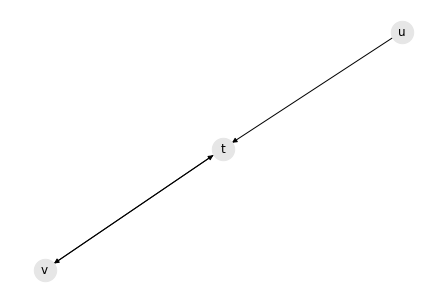

In [7]:
edges = [('u','t'), ('t','v'), ('v','t')]

G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw(G, nx.kamada_kawai_layout(G), node_size=500, node_color='0.9', with_labels=True)

If $t$ is the root vertex, then:

- $u.d$: 2
- $u.f$: 3
- $v.d$: 4
- $v.f$: 5

Therefore, if there is a path from $u$ to $v$, with $u.d < v.d$, $v$ does not have to be a descendant of $u$.

-----------------------------------------

### Question 5

\[10 pts, DFS\]

Solve exercise 22.3-9 (Cormen page 612).

Give a counterexample to the conjecture that if a directed graph $G$ contains a path from $u$ to $v$, then any depth-first search must result in $v.d \le u.f$.

### Answer

Consider the directed graph below:

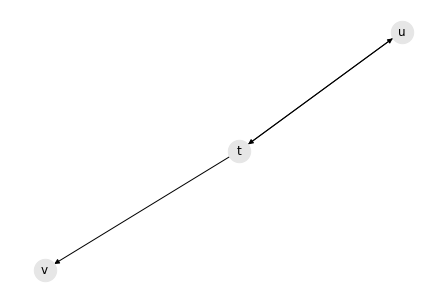

In [8]:
edges = [("t", "u"), ("t", "v"), ("u", "t")]

G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw(G, nx.kamada_kawai_layout(G), node_size=500, node_color='0.9', with_labels=True)

There is a path from $u$ to $v$. However, if $t$ is the source vertex for a DFS and process $u$ before $v$, then $v.d = 4 > u.f = 3$.

-----------------------------------------